In [72]:
import pandas as pd

In [74]:
import numpy as np

In [76]:
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [82]:
import seaborn as sns

In [84]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("Flight_Fare.xlsx", sheet_name="Sheet1")

# Data Preprocessing


# Convert Date_of_Journey to datetime and extract day & month

In [19]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y")
df["Journey_Day"] = df["Date_of_Journey"].dt.day
df["Journey_Month"] = df["Date_of_Journey"].dt.month

# Convert Dep_Time & Arrival_Time to hours


In [70]:
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Arrival_Time"] = df["Arrival_Time"].astype(str).str.split(" ").str[0]
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"], errors="coerce").dt.hour

C:\Users\Asus\AppData\Local\Temp\ipykernel_12904\489013516.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"], errors="coerce").dt.hour


In [25]:
df["Duration"] = df["Duration"].str.replace("h", "*60").str.replace("m", "").str.replace(" ", "+")
df["Duration"] = df["Duration"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Encode Total_Stops


In [28]:
df["Total_Stops"] = df["Total_Stops"].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

C:\Users\Asus\AppData\Local\Temp\ipykernel_12904\3559196112.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total_Stops"] = df["Total_Stops"].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})


# Drop unnecessary columns


In [31]:
df.drop(columns=["Date_of_Journey", "Route", "Additional_Info"], inplace=True)

# One-Hot Encoding for categorical variables


In [34]:
df = pd.get_dummies(df, columns=["Airline", "Source", "Destination"], drop_first=True)

# Drop missing values


In [37]:
df.dropna(inplace=True)

# Split into features and target


In [40]:
X = df.drop(columns=["Price"])
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Optimized Random Forest Model


In [43]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

# Predictions

In [46]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model Performance

In [49]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

In [51]:
print("Optimized R² Score:", r2_rf)
print("Optimized MAE:", mae_rf)
print("Optimized MSE:", mse_rf)
print("Optimized RMSE:", rmse_rf)

Optimized R² Score: 0.8193795069493733
Optimized MAE: 1301.3812477098822
Optimized MSE: 3894549.2444554847
Optimized RMSE: 1973.4612345965868


# EDA - Data Analysis


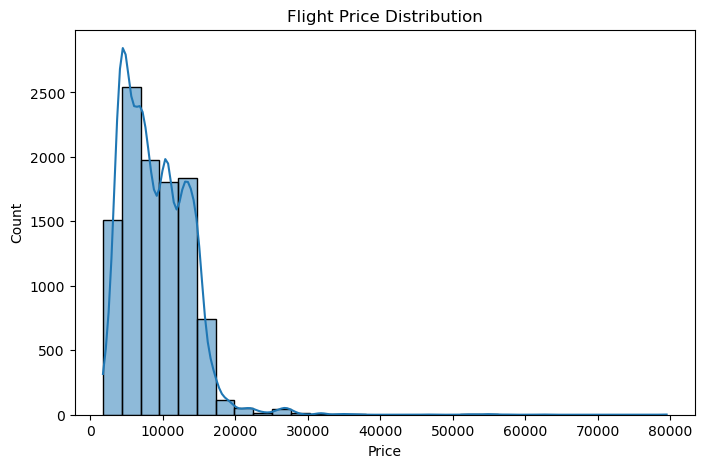

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Flight Price Distribution")
plt.show()

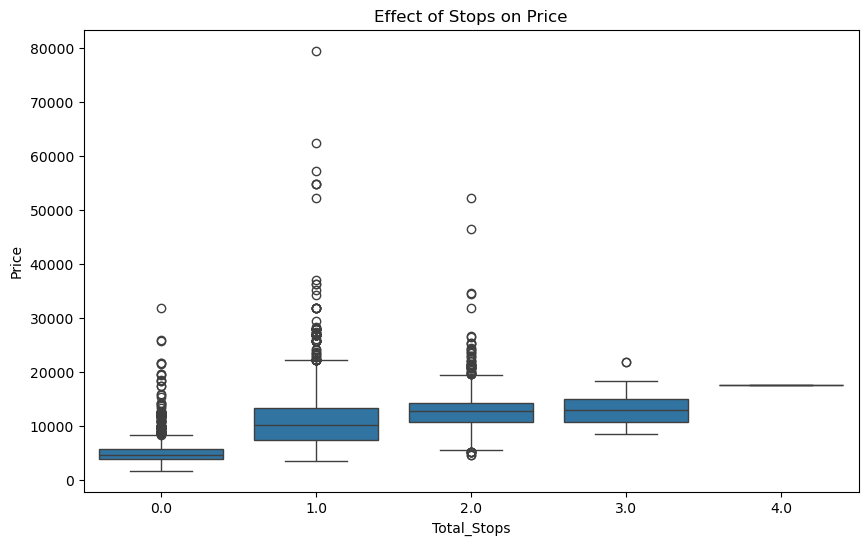

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Total_Stops", y="Price", data=df)
plt.title("Effect of Stops on Price")
plt.show()

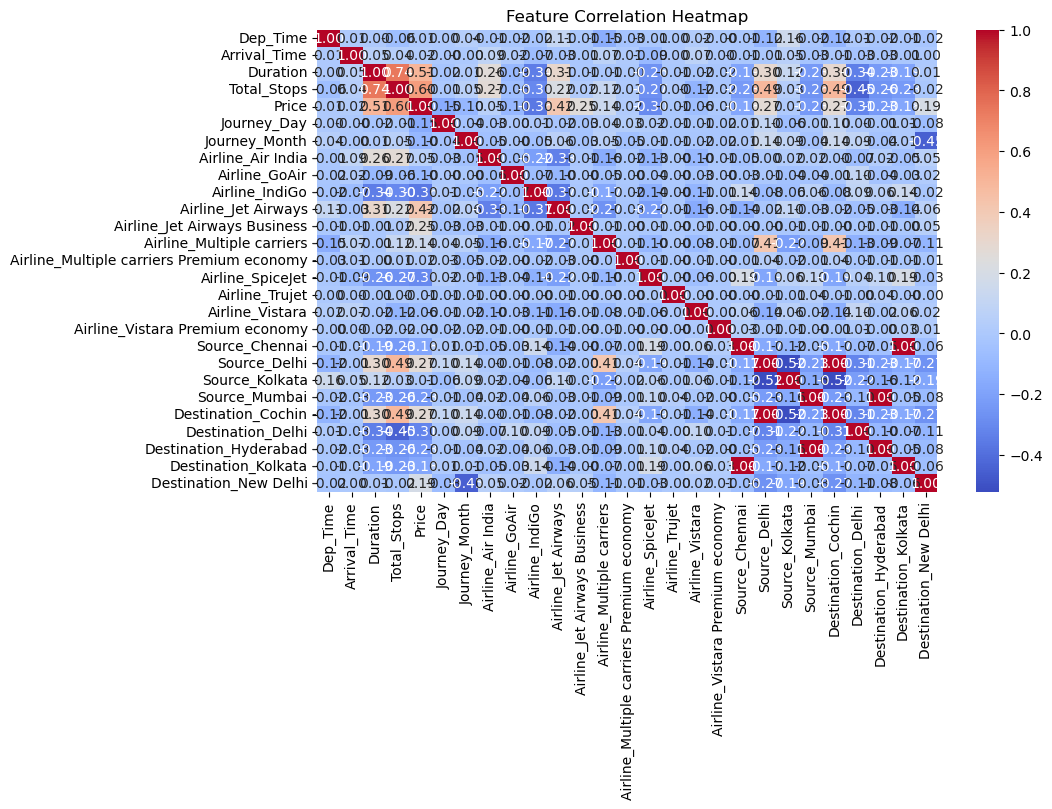

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()